<a href="https://colab.research.google.com/github/juliasalto/proyectoml/blob/main/decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook desarrollo la construcción de un modelo de árbol de decisión para el proyecto

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files


In [ ]:
df = pd.read_csv("/content/rh_data - rh_data (2).csv")

In [ ]:
df.head()

,Age,AgeCategory,Attrition,BusinessTravel,Department,DistanceFromHome,DistanceCategory,Education,EducationCategory,EducationField,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,CategoryYearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,D,No,Travel_Rarely,Sales,6,Mid-Short Distance,2,Graduated,Life Sciences,...,Y,11,8,0,1.0,6,1,A,0,0
1,31,B,Yes,Travel_Frequently,Research and Development,10,Mid-Long Distance,1,Undergraduated,Life Sciences,...,Y,23,8,1,6.0,3,5,B,1,4
2,32,B,No,Travel_Frequently,Research and Development,17,Long Distance,4,Mastery,Other,...,Y,15,8,3,5.0,2,5,B,0,3
3,38,C,No,Non-Travel,Research and Development,2,Short Distance,5,Doctorate,Life Sciences,...,Y,11,8,3,13.0,5,8,C,7,5
4,32,B,No,Travel_Rarely,Research and Development,10,Mid-Long Distance,1,Undergraduated,Medical,...,Y,12,8,2,9.0,2,6,C,0,4


Imputación de nulos

In [ ]:
mean_total_working_years = df['TotalWorkingYears'].mean()

df['TotalWorkingYears'].fillna(mean_total_working_years, inplace=True)
print(df['TotalWorkingYears'].isnull().sum())

0


In [ ]:
mean_num_companies = df['NumCompaniesWorked'].mean()

df['NumCompaniesWorked'].fillna(mean_num_companies, inplace=True)
print(df['NumCompaniesWorked'].isnull().sum())

0


In [ ]:
print(df.groupby('Attrition').size())

Attrition
No     3699
Yes     711
dtype: int64


*One-hot encoding* de variables categóricas

In [ ]:
df = pd.get_dummies(df, columns=['AgeCategory', 'DistanceCategory', 'BusinessTravel', 'Department', 'EducationCategory', 'EducationField', 'LevelCategory', 'JobRole', 'MaritalStatus', 'IncomeCategory', 'CategoryYearsAtCompany'], drop_first=True)

df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeCategory_Low Income,IncomeCategory_Mid Income,IncomeCategory_Mid-High Income,IncomeCategory_Mid-Low Income,CategoryYearsAtCompany_B,CategoryYearsAtCompany_C,CategoryYearsAtCompany_D
0,51,No,6,2,1,1,Female,1,131160,1.0,...,False,True,False,False,False,True,False,False,False,False
1,31,Yes,10,1,1,2,Female,1,41890,0.0,...,False,False,True,False,False,False,True,True,False,False
2,32,No,17,4,1,3,Male,4,193280,1.0,...,False,True,False,False,False,False,False,True,False,False
3,38,No,2,5,1,4,Male,3,83210,3.0,...,False,True,False,False,True,False,False,False,True,False
4,32,No,10,1,1,5,Male,1,23420,4.0,...,False,False,True,True,False,False,False,False,True,False


Definición de variables X e Y

In [ ]:
X = df.drop(columns=['Attrition', 'EmployeeID', 'EmployeeCount','Gender', 'Over18', 'StandardHours', 'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'])

# Definir la variable objetivo 'y' como la columna 'Attrition' (convertida en binaria)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

División de datos en entrenamiento (70%) y prueba (30%)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Balanceo de conjunto de entrenamiento

In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(y_train_balanced.value_counts())

Distribución de clases después del balanceo:
Attrition
0    2584
1    2584
Name: count, dtype: int64


Entrenamiento del árbol de decisión (30% de prueba)




In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
decision_tree_model.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(random_state=42)

Predicción, rendimiento y validación cruzada del modelo

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Validación cruzada (K=5)
cv_scores = cross_val_score(decision_tree_model, X_train_balanced, y_train_balanced, cv=5)

# Realizar predicciones con el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Mostrar los resultados de la validación cruzada
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Accuracy: 0.9758125472411187
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1115
           1       0.94      0.90      0.92       208

    accuracy                           0.98      1323
   macro avg       0.96      0.94      0.95      1323
weighted avg       0.98      0.98      0.98      1323

Cross-Validation Scores: [0.95631068 0.94983819 0.95623987 0.93841167 0.95461912]
Mean CV Score: 0.9510839063639176


Gráfico del primer modelo obtenido (decision_tree_model)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol a formato DOT con los nombres de características corregidos
dot_data = export_graphviz(decision_tree_model,
                           out_file=None,
                           feature_names=X_train_balanced.columns,
                           class_names=['Clase 0', 'Clase 1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear una visualización con graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guardar el archivo en formato .pdf o .png si lo prefieres
graph.view()

'decision_tree.pdf'

Curva de aprendizaje del árbol de decisión (sin parámetros).
En este gráfico se puede observar el *overfitting* del
modelo en el conjunto de entrenamiento y la mejora del rendimiento del conjunto de prueba a medida que aumentan los datos

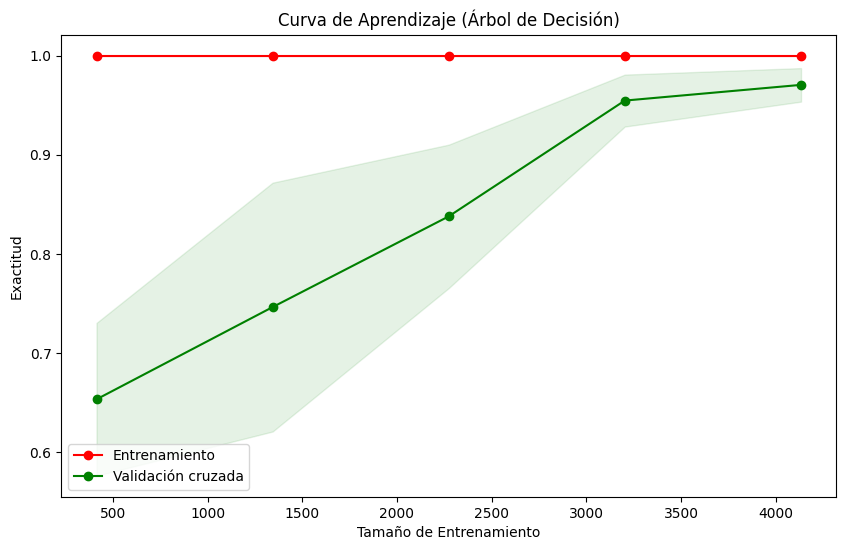

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Tamaño de Entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curva de Aprendizaje (Árbol de Decisión)")
plt.legend(loc="best")
plt.show()

Importancia de las variables en el modelo

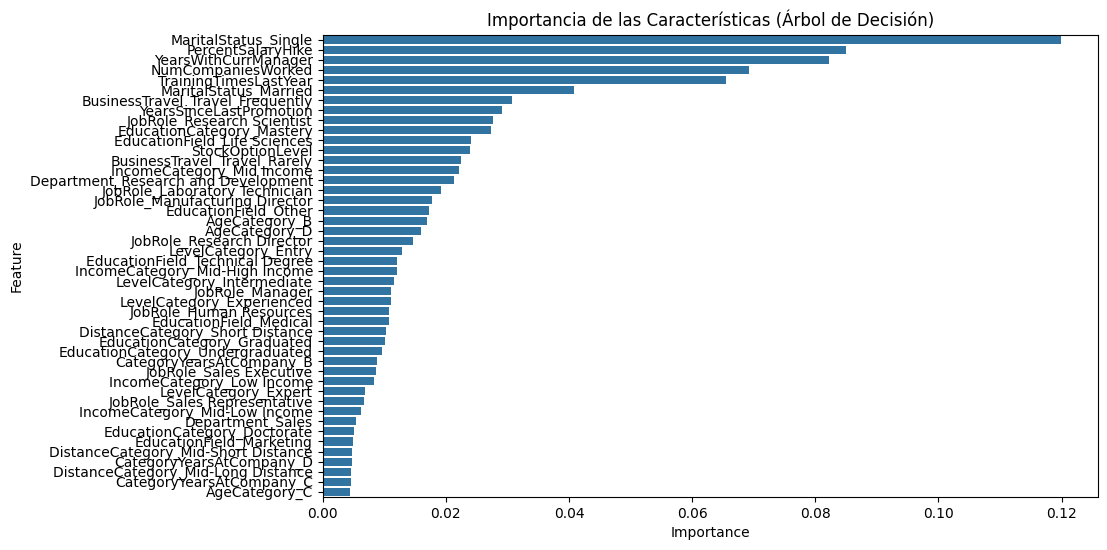

In [ ]:
# Obtener la importancia de las características
feature_importances = decision_tree_model.feature_importances_

# Ordenar las características más importantes
sorted_indices = np.argsort(feature_importances)[::-1]

# Crear un DataFrame para visualizar la importancia de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices],
    'Importance': feature_importances[sorted_indices]
})

# Visualizar las características más importantes
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Importancia de las Características (Árbol de Decisión)')
plt.show()

Prueba del modelo con datos nuevos

In [ ]:
df_1 = pd.read_csv("/content/rh_data - Hoja 2.csv")

In [ ]:
# Eliminar las columnas innecesarias en X_new
X_new = df_1.drop(columns=['Attrition', 'EmployeeID', 'EmployeeCount', 'Gender', 'Over18', 'StandardHours',
                           'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'JobLevel',
                           'TotalWorkingYears', 'YearsAtCompany'])

# Aplicar get_dummies para codificar las variables categóricas en X_new
X_new_encoded = pd.get_dummies(X_new)
X_new_encoded = X_new_encoded.reindex(columns=X_train_balanced.columns, fill_value=0)

# Predicciones con el modelo
y_new_pred = decision_tree_model.predict(X_new_encoded)

# Ver las predicciones
print(y_new_pred)


[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


Predicción y rendimiento del modelo con datos nuevos

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar las predicciones
accuracy = accuracy_score(y_new, y_new_pred)
report = classification_report(y_new, y_new_pred)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.67      0.67      0.67         3

    accuracy                           0.89        19
   macro avg       0.80      0.80      0.80        19
weighted avg       0.89      0.89      0.89        19



Predicción del modelo en el df de datos nuevos

In [ ]:
df_1['Attrition_Pred'] = y_new_pred

df_1.head()


,Age,AgeCategory,Attrition,BusinessTravel,Department,DistanceFromHome,DistanceCategory,Education,EducationCategory,EducationField,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,CategoryYearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Pred
0,34,B,No,Travel_Rarely,Human Resources,7,Mid-Short Distance,5,Doctorate,Life Sciences,...,11,8,0,1,6,1,A,0,0,1
1,45,D,Yes,Travel_Frequently,Research and Development,10,Mid-Long Distance,2,Graduated,Life Sciences,...,23,8,1,6,3,5,B,1,4,1
2,32,B,No,Travel_Frequently,Research and Development,6,Mid-Short Distance,3,Degree,Other,...,15,8,3,5,2,5,B,0,3,0
3,33,B,No,Non-Travel,Research and Development,2,Short Distance,2,Graduated,Life Sciences,...,11,8,3,13,5,8,C,7,5,0
4,60,D,No,Travel_Rarely,Research and Development,18,Long Distance,1,Undergraduated,Medical,...,12,8,2,9,2,6,C,0,4,0


Revisión de hiperparámetros para revisar el sobreajuste del modelo

In [ ]:
# Revisar los hiperparámetros actuales del modelo
print(decision_tree_model.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


Búsqueda de los hiperparámetros que mejor se ajusten al modelo, y ejecución de los mismos

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que queremos probar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # Prueba con distintos criterios de pureza
}

# Crear el modelo base
decision_tree_model_1 = DecisionTreeClassifier(random_state=42)

# Definir el GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model_1, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ajustar el GridSearch con los datos de entrenamiento
grid_search.fit(X_train_balanced, y_train_balanced)

# Mostrar los mejores parámetros encontrados
print("Best hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
best_model_tuned = DecisionTreeClassifier(**best_params, random_state=42)
best_model_tuned.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones con los nuevos datos
y_new_pred_tuned = best_model_tuned.predict(X_new_encoded)

# Evaluar el modelo ajustado
from sklearn.metrics import accuracy_score, classification_report

accuracy_tuned = accuracy_score(y_new, y_new_pred_tuned)
report_tuned = classification_report(y_new, y_new_pred_tuned)

print(f"Accuracy: {accuracy_tuned}")
print("Classification Report:\n", report_tuned)


Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.67      0.67      0.67         3

    accuracy                           0.89        19
   macro avg       0.80      0.80      0.80        19
weighted avg       0.89      0.89      0.89        19



Prueba con `max_depth = 15`

In [ ]:
# Entrenar el modelo con el mejor max_depth
best_depth = grid_search.best_params_['max_depth']
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree_model.fit(X_train_balanced, y_train_balanced)

# Evaluar el rendimiento en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1115
           1       0.56      0.66      0.60       208

    accuracy                           0.86      1323
   macro avg       0.75      0.78      0.76      1323
weighted avg       0.87      0.86      0.87      1323



In [ ]:
# Predicciones con el modelo
y_new_pred = decision_tree_model.predict(X_new_encoded)

# Ver las predicciones
print(y_new_pred)


[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar las predicciones
accuracy = accuracy_score(y_new, y_new_pred)
report = classification_report(y_new, y_new_pred)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.25      0.33      0.29         3

    accuracy                           0.74        19
   macro avg       0.56      0.57      0.56        19
weighted avg       0.77      0.74      0.75        19



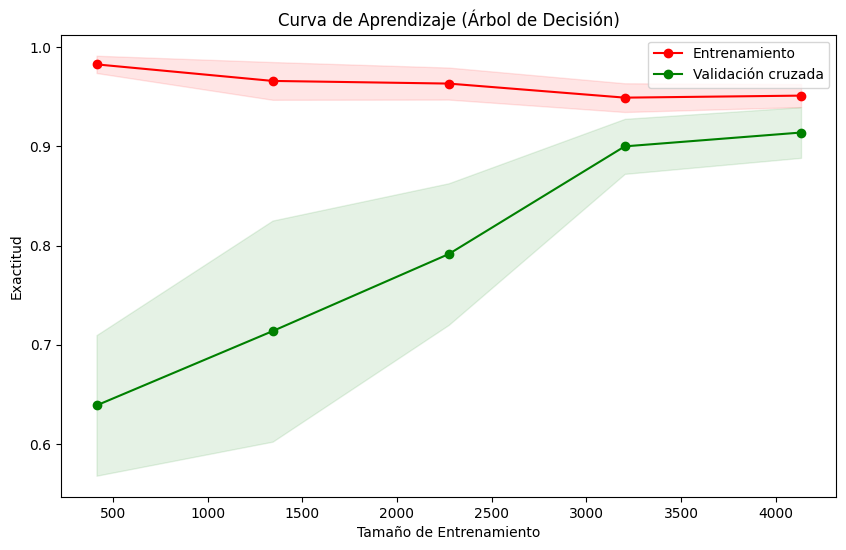

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Tamaño de Entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curva de Aprendizaje (Árbol de Decisión)")
plt.legend(loc="best")
plt.show()

Prueba con `max_depth = 5`

In [ ]:
# Entrenar el modelo con el mejor max_depth
best_depth = grid_search.best_params_['max_depth']
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train_balanced, y_train_balanced)

# Evaluar el rendimiento en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.7430083144368859
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1115
           1       0.30      0.48      0.37       208

    accuracy                           0.74      1323
   macro avg       0.60      0.64      0.60      1323
weighted avg       0.80      0.74      0.76      1323



In [ ]:
# Predicciones con el modelo
y_new_pred = decision_tree_model.predict(X_new_encoded)

# Ver las predicciones
print(y_new_pred)

[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar las predicciones
accuracy = accuracy_score(y_new, y_new_pred)
report = classification_report(y_new, y_new_pred)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7894736842105263
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.40      0.67      0.50         3

    accuracy                           0.79        19
   macro avg       0.66      0.74      0.68        19
weighted avg       0.85      0.79      0.81        19



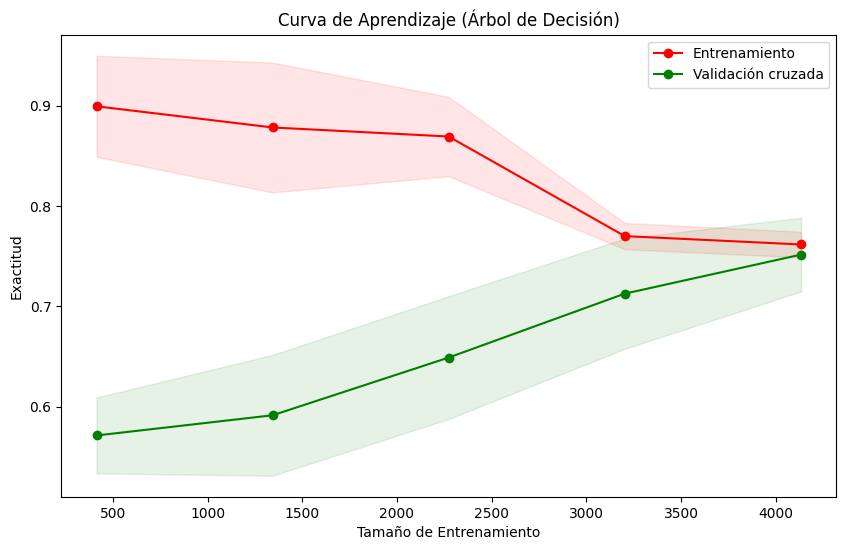

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Tamaño de Entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curva de Aprendizaje (Árbol de Decisión)")
plt.legend(loc="best")
plt.show()

Prueba con `max_depth = 5 ` y ` min_samples_split = 5`

In [ ]:
# Entrenar el modelo con el mejor max_depth
best_depth = grid_search.best_params_['max_depth']
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=5)
decision_tree_model.fit(X_train_balanced, y_train_balanced)

# Evaluar el rendimiento en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.7430083144368859
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1115
           1       0.30      0.48      0.37       208

    accuracy                           0.74      1323
   macro avg       0.60      0.64      0.60      1323
weighted avg       0.80      0.74      0.76      1323



In [ ]:
# Predicciones con el modelo
y_new_pred = decision_tree_model.predict(X_new_encoded)

# Ver las predicciones
print(y_new_pred)

[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar las predicciones
accuracy = accuracy_score(y_new, y_new_pred)
report = classification_report(y_new, y_new_pred)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7894736842105263
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.40      0.67      0.50         3

    accuracy                           0.79        19
   macro avg       0.66      0.74      0.68        19
weighted avg       0.85      0.79      0.81        19



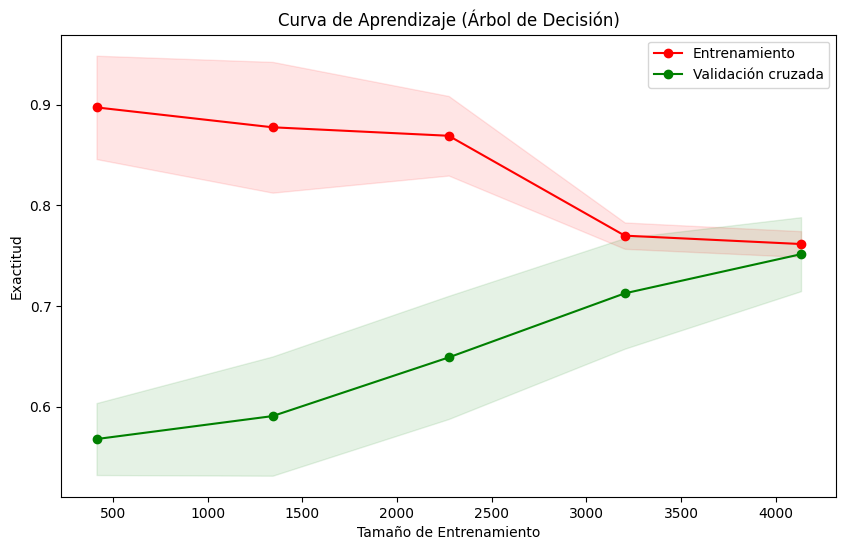

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Tamaño de Entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curva de Aprendizaje (Árbol de Decisión)")
plt.legend(loc="best")
plt.show()